In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt


/home/sahibachopra/miniconda/envs/ai/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import os
os.chdir('/home/sahibachopra/packt/')

In [3]:
data = pd.read_csv('german_credit.csv')

In [4]:
yVar = data['Creditability']
xVar = data.loc[:, data.columns != 'Creditability']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(800, 20) (800,)
(200, 20) (200,)


In [6]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
preds = clf.predict(X_test)

## let's build a confusion matrix!
- A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

In [8]:
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,32,24
1,22,122


## false negative is dangerous in the lending business because we would rather not give loans out to people than give loans to 28 people that will default

In [9]:
roc_auc_score(y_test, preds)

0.7093253968253969

## plot the roc curve
- An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
    1. True Positive Rate
    2. False Positive Rate
- Learn more here: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc 


In [10]:
y_prob = np.concatenate(((1-preds).reshape(-1,1),(preds).reshape(-1,1)), axis = 1)

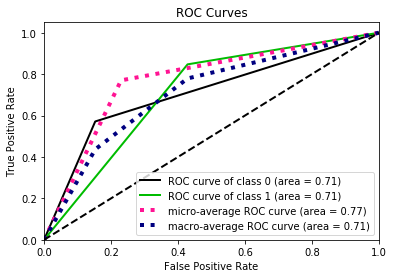

In [11]:
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()